# Analysis for the Telco company about their customers who churn

<b>The Telco company have many customers whi churn every month, so the executives of the company asked us to conduct an analysis to determine what causes they are losing customers. <i>Their marketing and customer service team</i> are really interested by the output of the analysis. they provided a dataset of 7000 clients</b>

In [218]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [214]:
df_Client = pd.read_csv("Telco_Customer_Churn.csv")
df_Client.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Analysis of the dataset

##### Variable Target : Churn

In [7]:
df_Client['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

#### shape of our dataset

In [11]:
df_Client.shape

(7043, 21)

#### Data types of our dataset

In [21]:
df_Client.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Viualisation of the data types of our dataset

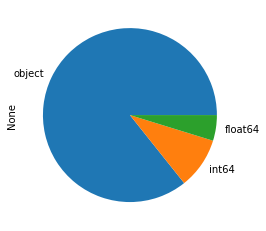

In [15]:
df_Client.dtypes.value_counts().plot.pie()

#### let's convert the dtype of the feature TotalCharges to float

In [61]:
df_Client["TotalCharges"] = pd.to_numeric(df_Client["TotalCharges"],errors='coerce')
df_Client["TotalCharges"].dtype

dtype('float64')

### Analysis of the dataset to identify the missing values

In [26]:
missing_values = df_Client.isnull()
missing_values.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())
    print("") 

customerID
False    7043
Name: customerID, dtype: int64

gender
False    7043
Name: gender, dtype: int64

SeniorCitizen
False    7043
Name: SeniorCitizen, dtype: int64

Partner
False    7043
Name: Partner, dtype: int64

Dependents
False    7043
Name: Dependents, dtype: int64

tenure
False    7043
Name: tenure, dtype: int64

PhoneService
False    7043
Name: PhoneService, dtype: int64

MultipleLines
False    7043
Name: MultipleLines, dtype: int64

InternetService
False    7043
Name: InternetService, dtype: int64

OnlineSecurity
False    7043
Name: OnlineSecurity, dtype: int64

OnlineBackup
False    7043
Name: OnlineBackup, dtype: int64

DeviceProtection
False    7043
Name: DeviceProtection, dtype: int64

TechSupport
False    7043
Name: TechSupport, dtype: int64

StreamingTV
False    7043
Name: StreamingTV, dtype: int64

StreamingMovies
False    7043
Name: StreamingMovies, dtype: int64

Contract
False    7043
Name: Contract, dtype: int64

PaperlessBilling
False    7043
Name: PaperlessBill

#### from the previous command we can see there's no missing values but let's now visualize the missing values if exist

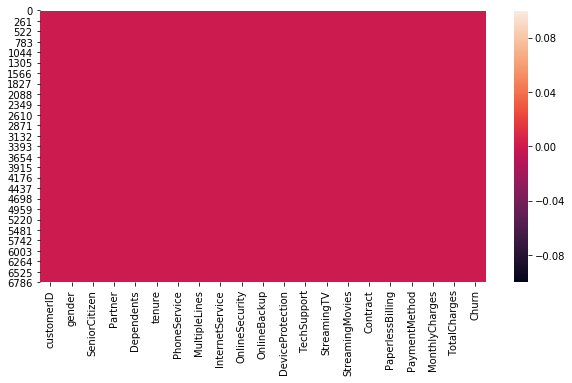

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df_Client.isnull())

#### now we can be sure that the dataset doesn't contain missing values

#### Total of the customers who churn this month

In [6]:
churn_counts = df_Client['Churn'].value_counts().to_frame()
churn_counts.rename(columns={'Churn': 'value_counts'}, inplace=True)
churn_counts.index.name = 'Churn'
churn_counts.head(10)

,value_counts
Churn,
No,5174
Yes,1869


#### In Percent

In [27]:
df_Client['Churn'].value_counts(normalize="True")

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

#### 1869 customers churn this month which represents 26,54% of the dataset

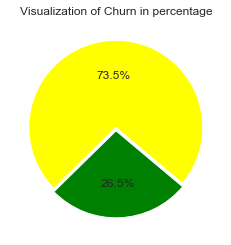

In [250]:
size = df_Client["Churn"].value_counts(sort=True)
color =["yellow","green"]
explode=(0.02,0.02)
plt.pie(size,colors=color, explode=explode,autopct='%1.1f%%',startangle=320)
plt.title("Visualization of Churn in percentage")
plt.show()

## what impact the churn has on the Company?

<b>we saw above how many customers left the company, let's now see how much money the company lost</b>

In [254]:
df_churn = df_Client[['Churn','MonthlyCharges']].groupby(['Churn']).MonthlyCharges.sum().to_frame().reset_index()
df_churn

,Churn,MonthlyCharges
0,No,316985.75
1,Yes,139130.85


#### In percentage

In [259]:
df_churn = df_Client[['Churn','MonthlyCharges']].groupby(['Churn']).MonthlyCharges.sum().to_frame()/df_Client['MonthlyCharges'].sum()
df_churn

,MonthlyCharges
Churn,
No,0.694966
Yes,0.305034


##### the company has lost 139.130,85$ which represents 31% of their monthly charges.

#### let' s split the dataset between the clients who churned and those who didn't

In [247]:
churn     = df_Client[df_Client["Churn"] == "Yes"]
not_churn = df_Client[df_Client["Churn"] == "No"]


<b>Explain churn by the below categories:</b>
<ol><li> Customer demographics like age and gender</li>
    <li>Services used</li>
    <li> Billing information</li>
</ol>

#### Churn explain by Customer demographic

In [123]:
demographic = df_Client[["gender","SeniorCitizen","Partner","Dependents","Churn"]]
demographic

,gender,SeniorCitizen,Partner,Dependents,Churn
0,Female,0,Yes,No,No
1,Male,0,No,No,No
2,Male,0,No,No,Yes
3,Male,0,No,No,No
4,Female,0,No,No,Yes
...,...,...,...,...,...
7038,Male,0,Yes,Yes,No
7039,Female,0,Yes,Yes,No
7040,Female,0,Yes,Yes,No
7041,Male,1,Yes,No,Yes


In [125]:
demographic[["gender","SeniorCitizen","Partner","Dependents","Churn"]].groupby(["gender","SeniorCitizen","Partner","Dependents","Churn"]).size().to_frame().rename(columns ={0:"count"}).reset_index()

,gender,SeniorCitizen,Partner,Dependents,Churn,count
0,Female,0,No,No,No,909
1,Female,0,No,No,Yes,429
2,Female,0,No,Yes,No,110
3,Female,0,No,Yes,Yes,32
4,Female,0,Yes,No,No,482
5,Female,0,Yes,No,Yes,114
6,Female,0,Yes,Yes,No,720
7,Female,0,Yes,Yes,Yes,124
8,Female,1,No,No,No,159
9,Female,1,No,No,Yes,158


Text(0.5, 1.0, 'Dependents')

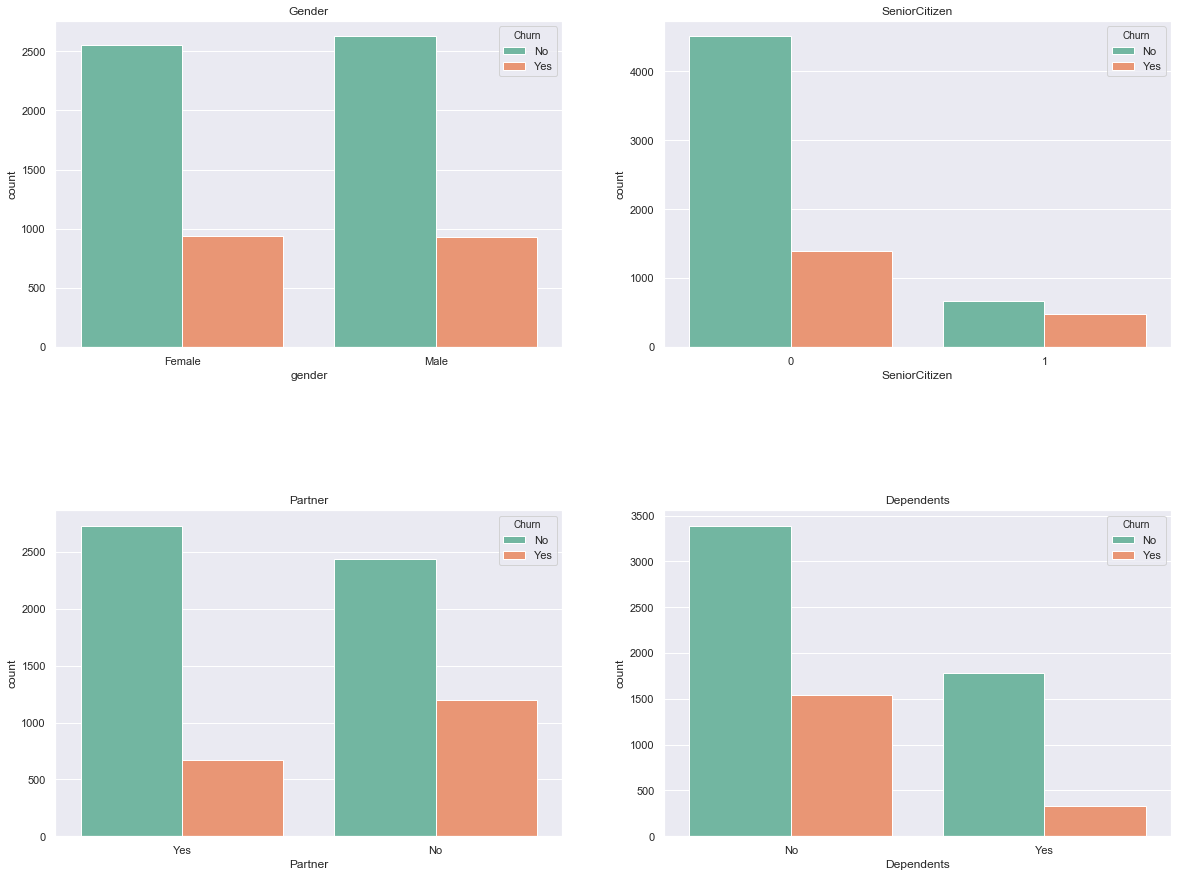

In [216]:
fig,axes =plt.subplots(2,2,figsize =(20,15))
plt.subplots_adjust(hspace = 0.5)
sns.set(style="darkgrid")
ax1 = sns.countplot(x="gender", data=demographic,palette="Set2", hue="Churn" ,ax=axes[0,0])
ax2  = sns.countplot(x="SeniorCitizen" , data=demographic,palette="Set2", hue="Churn", ax=axes[0,1])
ax3  = sns.countplot(x="Partner" , data=demographic,palette="Set2", hue="Churn",ax=axes[1,0])
ax4  = sns.countplot(x="Dependents" , data=demographic,palette="Set2", hue="Churn",ax=axes[1,1])

ax1.set_title("Gender")
ax2.set_title("SeniorCitizen")
ax3.set_title("Partner")
ax4.set_title("Dependents")


In [135]:
ServiceUsed = df_Client[["PhoneService","MultipleLines","InternetService","OnlineSecurity","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Churn"]]
ServiceUsed

,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,No,No phone service,DSL,No,No,No,No,No,No
1,Yes,No,DSL,Yes,Yes,No,No,No,No
2,Yes,No,DSL,Yes,No,No,No,No,Yes
3,No,No phone service,DSL,Yes,Yes,Yes,No,No,No
4,Yes,No,Fiber optic,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No
7039,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,No
7040,No,No phone service,DSL,Yes,No,No,No,No,No
7041,Yes,Yes,Fiber optic,No,No,No,No,No,Yes


Text(0.5, 1.0, 'StreamingMovies')

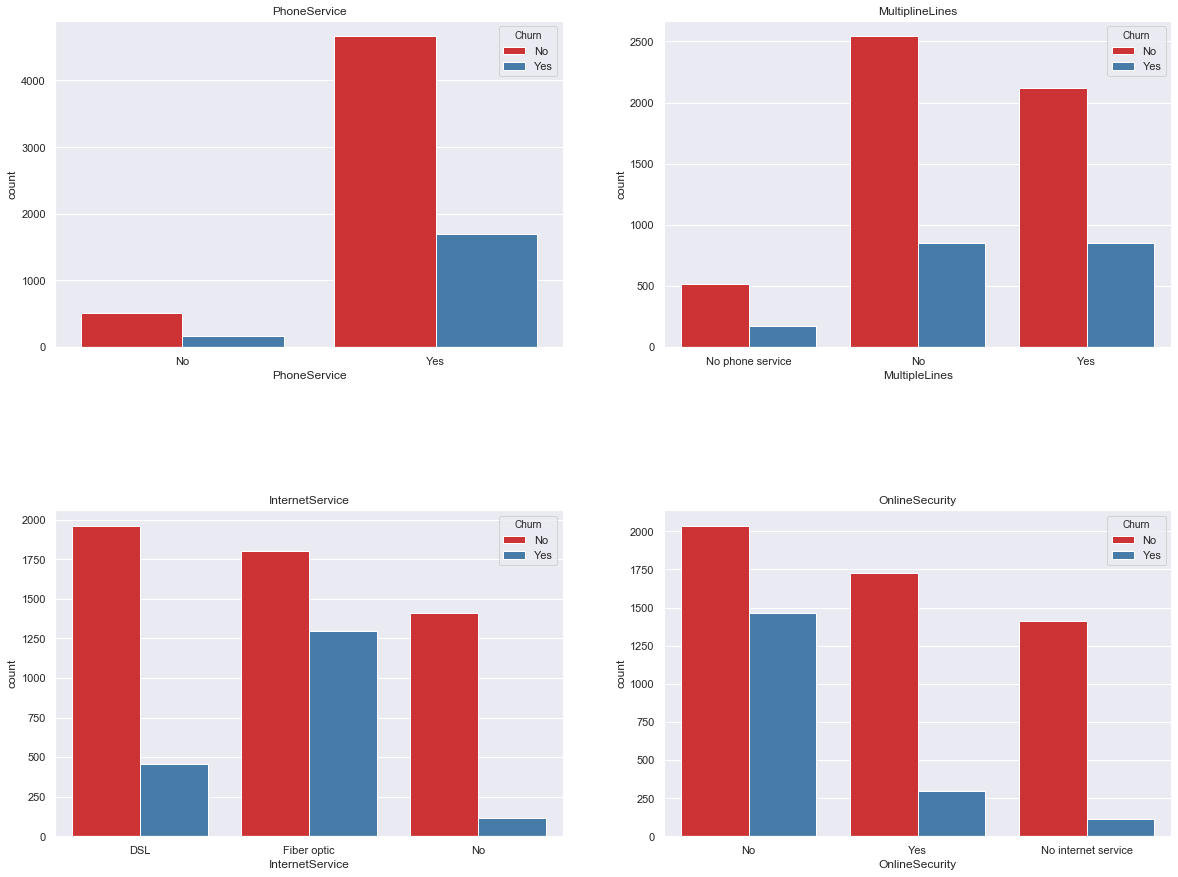

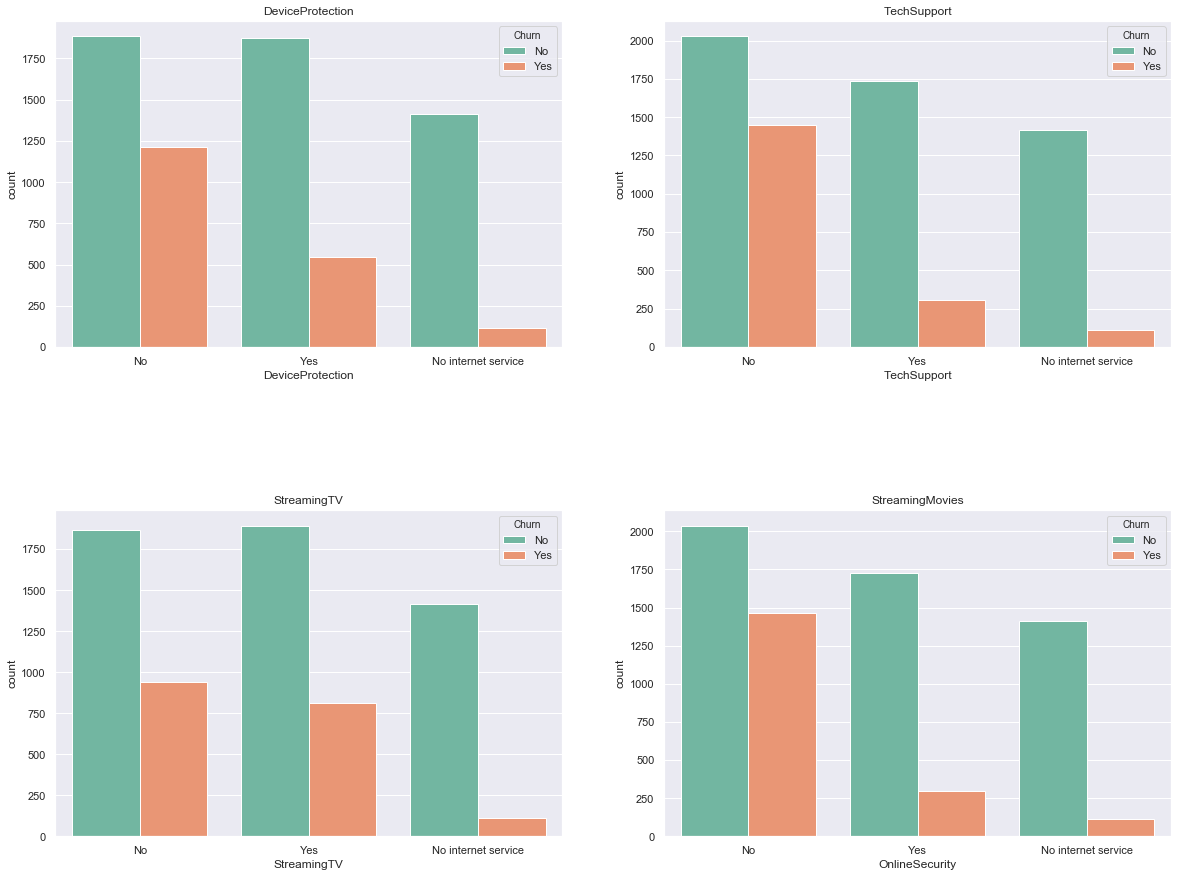

In [217]:
fig,axes =plt.subplots(2,2,figsize =(20,15))
plt.subplots_adjust(hspace = 0.5)
sns.set(style="darkgrid")
ax5 = sns.countplot(x="PhoneService", data=ServiceUsed,palette="Set1",hue ="Churn" ,ax=axes[0,0])
ax5.set_title("PhoneService")

ax6  = sns.countplot(x="MultipleLines" , data=ServiceUsed,palette="Set1",hue ="Churn" ,ax=axes[0,1])
ax6.set_title("MultiplineLines")

ax7  = sns.countplot(x="InternetService" , data=ServiceUsed,palette="Set1",hue ="Churn" ,ax=axes[1,0])
ax7.set_title("InternetService")

ax8  = sns.countplot(x="OnlineSecurity" , data=ServiceUsed,palette="Set1",hue ="Churn" ,ax=axes[1,1])
ax8.set_title("OnlineSecurity")

fig,axes =plt.subplots(2,2,figsize =(20,15))
plt.subplots_adjust(hspace = 0.5)
sns.set(style="darkgrid")
ax9  = sns.countplot(x="DeviceProtection" , data=ServiceUsed,palette="Set2",hue ="Churn" ,ax=axes[0,0])
ax9.set_title("DeviceProtection")

ax10  = sns.countplot(x="TechSupport" , data=ServiceUsed,palette="Set2",hue ="Churn" ,ax=axes[0,1])
ax10.set_title("TechSupport")

ax11  = sns.countplot(x="StreamingTV" , data=ServiceUsed,palette="Set2",hue="Churn" ,ax=axes[1,0])
ax11.set_title("StreamingTV")

ax12  = sns.countplot(x="OnlineSecurity" , data=ServiceUsed,palette="Set2", hue ="Churn" ,ax=axes[1,1])
ax12.set_title("StreamingMovies")



In [151]:
billing_information = df_Client[["Contract","PaperlessBilling","PaymentMethod","Churn"]]
billing_information

,Contract,PaperlessBilling,PaymentMethod,Churn
0,Month-to-month,Yes,Electronic check,No
1,One year,No,Mailed check,No
2,Month-to-month,Yes,Mailed check,Yes
3,One year,No,Bank transfer (automatic),No
4,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...
7038,One year,Yes,Mailed check,No
7039,One year,Yes,Credit card (automatic),No
7040,Month-to-month,Yes,Electronic check,No
7041,Month-to-month,Yes,Mailed check,Yes


In [152]:
billing_information[["Contract","PaperlessBilling","PaymentMethod","Churn"]].groupby(["Contract","PaperlessBilling","PaymentMethod","Churn"]).size().to_frame().rename(columns ={0:"count"}).reset_index()

,Contract,PaperlessBilling,PaymentMethod,Churn,count
0,Month-to-month,No,Bank transfer (automatic),No,151
1,Month-to-month,No,Bank transfer (automatic),Yes,55
2,Month-to-month,No,Credit card (automatic),No,116
3,Month-to-month,No,Credit card (automatic),Yes,45
4,Month-to-month,No,Electronic check,No,265
5,Month-to-month,No,Electronic check,Yes,188
6,Month-to-month,No,Mailed check,No,351
7,Month-to-month,No,Mailed check,Yes,118
8,Month-to-month,Yes,Bank transfer (automatic),No,237
9,Month-to-month,Yes,Bank transfer (automatic),Yes,146


Text(0.5, 1.0, 'PaymentMethod')

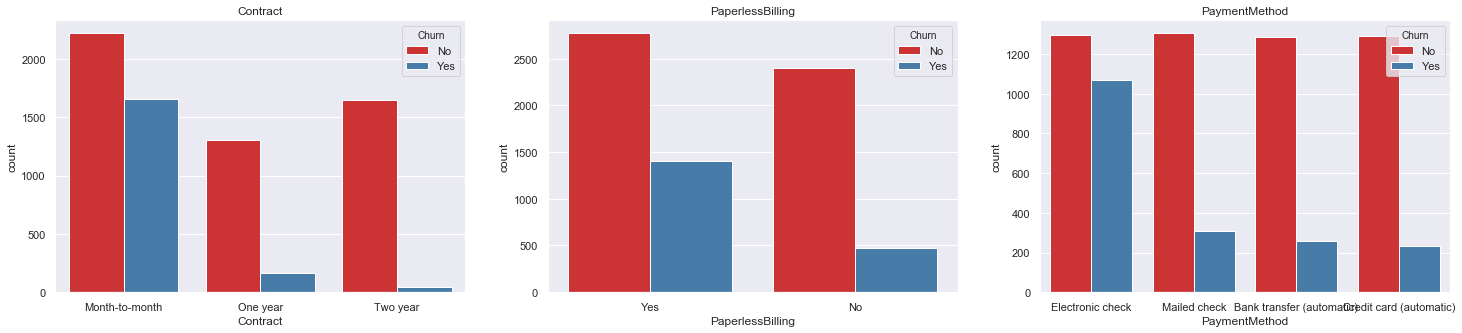

In [191]:
fig,axes =plt.subplots(1,3,figsize =(25,5))
plt.subplots_adjust(wspace = 0.2)
sns.set(style="darkgrid")
ax1 = sns.countplot(x="Contract", data=billing_information,palette="Set1", hue="Churn" ,ax=axes[0])
ax2  = sns.countplot(x="PaperlessBilling", data=billing_information,palette="Set1", hue="Churn", ax=axes[1])
ax3  = sns.countplot(x="PaymentMethod", data=billing_information,palette="Set1", hue="Churn",ax=axes[2])

ax1.set_title("Contract")
ax2.set_title("PaperlessBilling")
ax3.set_title("PaymentMethod")